In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
color_coll =["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6","#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6","#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6","#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6","#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6","#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6","#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

In [3]:
data = pd.read_csv("dataset/historical_data.csv")
data.shape

(197428, 16)

In [4]:
df = data.copy()
df.shape

(197428, 16)

In [5]:
df.head()

market_id           created_at actual_delivery_time  store_id  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:27:16      1845   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:56:29      5477   
2        3.0  2015-01-22 20:39:28  2015-01-22 21:09:09      5477   
3        3.0  2015-02-03 21:21:45  2015-02-03 22:13:00      5477   
4        3.0  2015-02-15 02:40:36  2015-02-15 03:20:26      5477   

  store_primary_category  order_protocol  total_items  subtotal  \
0               american             1.0            4      3441   
1                mexican             2.0            1      1900   
2                    NaN             1.0            1      1900   
3                    NaN             1.0            6      6900   
4                    NaN             1.0            3      3900   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   1            1900            1900                    1.0   
3                   5             600            1800                    1.0   
4                   3            1100            1600                    6.0   

   total_busy_dashers  total_outstanding_orders  \
0                14.0                      21.0   
1                 2.0                       2.0   
2                 0.0                       0.0   
3                 1.0                       2.0   
4                 6.0                       9.0   

   estimated_order_place_duration  \
0                             446   
1                             446   
2                             446   
3                             446   
4                             446   

   estimated_store_to_consumer_driving_duration  
0                                         861.0  
1                                         690.0  
2                                         690.0  
3                                         289.0  
4                                         650.0

In [6]:
df.dtypes

market_id                                       float64
created_at                                       object
actual_delivery_time                             object
store_id                                          int64
store_primary_category                           object
order_protocol                                  float64
total_items                                       int64
subtotal                                          int64
num_distinct_items                                int64
min_item_price                                    int64
max_item_price                                    int64
total_onshift_dashers                           float64
total_busy_dashers                              float64
total_outstanding_orders                        float64
estimated_order_place_duration                    int64
estimated_store_to_consumer_driving_duration    float64
dtype: object

In [7]:
df["created_at"] = pd.to_datetime(df["created_at"])
df["actual_delivery_time"] = pd.to_datetime(df["actual_delivery_time"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     196441 non-null  float64       
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  int64         
 4   store_primary_category                        192668 non-null  object        
 5   order_protocol                                196433 non-null  float64       
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

In [8]:
df.isna().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [9]:
store_id_unique = df["store_id"].unique().tolist()
store_id_unique[:10]

[1845, 5477, 2841, 4139, 5058, 4149, 3201, 5054, 2004, 1984]

In [10]:
"""Creating a refrence dictionary, getting the unique values from `store_id` and then the values 
based on that unique value and we will see what most cuisine category they serve based on that 
we will map the cuisine category to store id and fill the null values"""
store_id_and_category = {store_id : df[df.store_id == store_id].store_primary_category.mode() for store_id in store_id_unique}
store_id_and_category

{1845: 0    american
 Name: store_primary_category, dtype: object,
 5477: 0     indian
 1    mexican
 Name: store_primary_category, dtype: object,
 2841: 0    italian
 Name: store_primary_category, dtype: object,
 4139: 0    mexican
 Name: store_primary_category, dtype: object,
 5058: 0    italian
 Name: store_primary_category, dtype: object,
 4149: 0    sandwich
 1        thai
 Name: store_primary_category, dtype: object,
 3201: 0    cafe
 Name: store_primary_category, dtype: object,
 5054: 0    italian
 Name: store_primary_category, dtype: object,
 2004: 0    american
 Name: store_primary_category, dtype: object,
 1984: 0    chinese
 Name: store_primary_category, dtype: object,
 4905: 0    mexican
 Name: store_primary_category, dtype: object,
 1698: 0    sandwich
 Name: store_primary_category, dtype: object,
 1936: 0    singaporean
 Name: store_primary_category, dtype: object,
 6015: 0    burger
 Name: store_primary_category, dtype: object,
 976: 0    breakfast
 Name: store_primary_c

In [11]:
for store_id in store_id_unique:
    print(store_id)

1845
5477
2841
4139
5058
4149
3201
5054
2004
1984
4905
1698
1936
6015
976
5081
1019
3994
6395
3879
6517
6584
4003
1848
3654
6241
1521
5326
1203
3155
2527
2183
2652
3065
414
3468
5674
2716
4251
1148
4062
280
2621
2928
132
2096
5579
6153
2009
2769
5667
4753
3821
1788
5788
6115
963
3427
517
1807
1498
5226
1904
2273
4655
6922
4320
6132
5171
5152
4616
4215
4031
3220
4476
1808
1540
6313
6359
3469
1867
1384
562
6296
5547
1275
6740
429
3404
6045
6872
6287
5550
2751
3243
283
6852
2742
6025
5003
4566
1269
3845
4491
1027
2223
2849
238
265
4182
4046
4534
2187
3307
3639
2938
2203
3997
2731
4925
4346
6418
6544
658
4818
5589
3560
6165
5711
4582
368
59
6516
5234
1113
1451
3329
2853
199
3999
6575
6126
2155
70
2660
3302
1997
4529
6183
3388
4369
1865
2878
1380
6252
6477
1724
4352
3230
1699
6078
1777
1849
4314
2851
6668
3990
490
6037
1940
604
2952
2547
948
2549
4324
434
1667
6829
3370
3216
5606
4228
4270
1541
4247
3910
1218
4302
6302
3000
6081
4267
6632
1743
5155
4514
3286
3394
1297
4864
4430
2615
4978
51

In [12]:
df[df.store_id == 2841]

market_id          created_at actual_delivery_time  store_id  \
14        1.0 2015-02-12 03:36:46  2015-02-12 04:14:39      2841   
15        1.0 2015-01-27 02:12:36  2015-01-27 03:02:24      2841   
16        1.0 2015-02-06 00:42:42  2015-02-06 02:10:29      2841   
17        1.0 2015-02-08 02:04:17  2015-02-08 03:27:13      2841   
18        1.0 2015-01-31 04:35:54  2015-01-31 05:47:30      2841   

   store_primary_category  order_protocol  total_items  subtotal  \
14                italian             1.0            1      1525   
15                italian             1.0            2      3620   
16                italian             1.0            3      4475   
17                italian             1.0            3      4375   
18                italian             1.0            2      3150   

    num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
14                   1            1525            1525                    5.0   
15                   2            1425            2195                    5.0   
16                   3             925            1825                    4.0   
17                   3            1325            1625                    6.0   
18                   2            1425            1725                    4.0   

    total_busy_dashers  total_outstanding_orders  \
14                 6.0                       8.0   
15                 5.0                       7.0   
16                 1.0                       1.0   
17                 4.0                       3.0   
18                 9.0                      12.0   

    estimated_order_place_duration  \
14                             446   
15                             446   
16                             446   
17                             446   
18                             446   

    estimated_store_to_consumer_driving_duration  
14                                         795.0  
15                                         205.0  
16                                         542.0  
17                                         789.0  
18                                         548.0

In [13]:
df[df.store_id == 2841].store_primary_category.mode()

0    italian
Name: store_primary_category, dtype: object

In [14]:
store_id_and_category[2841].values[0]

'italian'

In [15]:
def fill(store_id):
    try:

        return store_id_and_category[store_id].values[0]
    except:
        return np.nan 
    
df["non_null_primary_category"] = df.store_id.apply(fill)

In [16]:
df.head()

market_id          created_at actual_delivery_time  store_id  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:27:16      1845   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:56:29      5477   
2        3.0 2015-01-22 20:39:28  2015-01-22 21:09:09      5477   
3        3.0 2015-02-03 21:21:45  2015-02-03 22:13:00      5477   
4        3.0 2015-02-15 02:40:36  2015-02-15 03:20:26      5477   

  store_primary_category  order_protocol  total_items  subtotal  \
0               american             1.0            4      3441   
1                mexican             2.0            1      1900   
2                    NaN             1.0            1      1900   
3                    NaN             1.0            6      6900   
4                    NaN             1.0            3      3900   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   1            1900            1900                    1.0   
3                   5             600            1800                    1.0   
4                   3            1100            1600                    6.0   

   total_busy_dashers  total_outstanding_orders  \
0                14.0                      21.0   
1                 2.0                       2.0   
2                 0.0                       0.0   
3                 1.0                       2.0   
4                 6.0                       9.0   

   estimated_order_place_duration  \
0                             446   
1                             446   
2                             446   
3                             446   
4                             446   

   estimated_store_to_consumer_driving_duration non_null_primary_category  
0                                         861.0                  american  
1                                         690.0                    indian  
2                                         690.0                    indian  
3                                         289.0                    indian  
4                                         650.0                    indian

In [17]:
df.store_primary_category.value_counts(dropna=False)[:20]

store_primary_category
american         19399
pizza            17321
mexican          17099
burger           10958
sandwich         10060
chinese           9421
japanese          9196
dessert           8773
fast              7372
indian            7314
thai              7225
italian           7179
vietnamese        6095
mediterranean     5512
breakfast         5425
NaN               4760
other             3988
salad             3745
greek             3326
seafood           2730
Name: count, dtype: int64

In [18]:
df.non_null_primary_category.value_counts(dropna=False)[:20]

non_null_primary_category
american         20025
pizza            17616
mexican          17316
burger           11318
sandwich         10289
chinese           9504
japanese          9422
dessert           9082
fast              7551
indian            7441
thai              7355
italian           7272
vietnamese        6106
breakfast         5535
mediterranean     5516
other             3975
salad             3834
greek             3390
seafood           2841
barbecue          2743
Name: count, dtype: int64

In [19]:
df.non_null_primary_category.unique()

array(['american', 'indian', 'italian', 'mexican', 'sandwich', 'cafe',
       'chinese', 'singaporean', 'burger', 'breakfast', 'mediterranean',
       'japanese', nan, 'catering', 'filipino', 'convenience-store',
       'greek', 'other', 'korean', 'asian', 'barbecue', 'fast',
       'vietnamese', 'cajun', 'steak', 'thai', 'pizza', 'soup', 'dessert',
       'persian', 'sushi', 'chocolate', 'british', 'nepalese', 'salad',
       'pasta', 'seafood', 'dim-sum', 'smoothie', 'afghan', 'vegan',
       'middle-eastern', 'hawaiian', 'german', 'peruvian', 'alcohol',
       'vegetarian', 'comfort-food', 'french', 'ethiopian', 'gluten-free',
       'bubble-tea', 'latin-american', 'moroccan', 'pakistani', 'spanish',
       'gastropub', 'turkish', 'burmese', 'southern', 'tapas', 'russian',
       'european', 'caribbean', 'argentine', 'malaysian', 'kosher',
       'irish', 'brazilian', 'lebanese', 'belgian', 'cheese',
       'indonesian', 'african', 'alcohol-plus-food'], dtype=object)

In [20]:
df.isna().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
non_null_primary_category                         867
dtype: int64

In [21]:
df.corr(method='pearson',numeric_only=True)

market_id  store_id  \
market_id                                      1.000000  0.017301   
store_id                                       0.017301  1.000000   
order_protocol                                -0.021895  0.019554   
total_items                                   -0.006855 -0.008796   
subtotal                                      -0.016237 -0.013370   
num_distinct_items                             0.002557 -0.012727   
min_item_price                                -0.000150 -0.009128   
max_item_price                                -0.004921 -0.018661   
total_onshift_dashers                          0.069752 -0.023141   
total_busy_dashers                             0.060488 -0.023245   
total_outstanding_orders                       0.063754 -0.020348   
estimated_order_place_duration                -0.053241  0.017469   
estimated_store_to_consumer_driving_duration   0.006597  0.001953   

                                              order_protocol  total_items  \
market_id                                          -0.021895    -0.006855   
store_id                                            0.019554    -0.008796   
order_protocol                                      1.000000     0.008790   
total_items                                         0.008790     1.000000   
subtotal                                           -0.053623     0.558067   
num_distinct_items                                 -0.023342     0.763912   
min_item_price                                     -0.045421    -0.393149   
max_item_price                                     -0.090960    -0.058233   
total_onshift_dashers                               0.145022     0.031732   
total_busy_dashers                                  0.149584     0.028602   
total_outstanding_orders                            0.134895     0.034380   
estimated_order_place_duration                     -0.678222    -0.023643   
estimated_store_to_consumer_driving_duration       -0.008326     0.004692   

                                              subtotal  num_distinct_items  \
market_id                                    -0.016237            0.002557   
store_id                                     -0.013370           -0.012727   
order_protocol                               -0.053623           -0.023342   
total_items                                   0.558067            0.763912   
subtotal                                      1.000000            0.681101   
num_distinct_items                            0.681101            1.000000   
min_item_price                                0.037038           -0.448739   
max_item_price                                0.505547            0.041871   
total_onshift_dashers                         0.130831            0.065943   
total_busy_dashers                            0.125566            0.060638   
total_outstanding_orders                      0.130106            0.067800   
estimated_order_place_duration                0.039043            0.003507   
estimated_store_to_consumer_driving_duration  0.034665            0.022693   

                                              min_item_price  max_item_price  \
market_id                                          -0.000150       -0.004921   
store_id                                           -0.009128       -0.018661   
order_protocol                                     -0.045421       -0.090960   
total_items                                        -0.393149       -0.058233   
subtotal                                            0.037038        0.505547   
num_distinct_items                                 -0.448739        0.041871   
min_item_price                                      1.000000        0.545484   
max_item_price                                      0.545484        1.000000   
total_onshift_dashers                               0.042368        0.133113   
total_busy_dashers                                  0.043881        0.131005   
total_outstanding_orders   

In [22]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration',
       'non_null_primary_category'],
      dtype='object')

In [23]:
df["actual_time_for_delivery"] = df["actual_delivery_time"] - df["created_at"]
df.head()

market_id          created_at actual_delivery_time  store_id  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:27:16      1845   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:56:29      5477   
2        3.0 2015-01-22 20:39:28  2015-01-22 21:09:09      5477   
3        3.0 2015-02-03 21:21:45  2015-02-03 22:13:00      5477   
4        3.0 2015-02-15 02:40:36  2015-02-15 03:20:26      5477   

  store_primary_category  order_protocol  total_items  subtotal  \
0               american             1.0            4      3441   
1                mexican             2.0            1      1900   
2                    NaN             1.0            1      1900   
3                    NaN             1.0            6      6900   
4                    NaN             1.0            3      3900   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   1            1900            1900                    1.0   
3                   5             600            1800                    1.0   
4                   3            1100            1600                    6.0   

   total_busy_dashers  total_outstanding_orders  \
0                14.0                      21.0   
1                 2.0                       2.0   
2                 0.0                       0.0   
3                 1.0                       2.0   
4                 6.0                       9.0   

   estimated_order_place_duration  \
0                             446   
1                             446   
2                             446   
3                             446   
4                             446   

   estimated_store_to_consumer_driving_duration non_null_primary_category  \
0                                         861.0                  american   
1                                         690.0                    indian   
2                                         690.0                    indian   
3                                         289.0                    indian   
4                                         650.0                    indian   

  actual_time_for_delivery  
0          0 days 01:02:59  
1          0 days 01:07:04  
2          0 days 00:29:41  
3          0 days 00:51:15  
4          0 days 00:39:50

In [24]:
df["actual_time_for_delivery"] = df["actual_time_for_delivery"].dt.total_seconds()
df.head()

market_id          created_at actual_delivery_time  store_id  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:27:16      1845   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:56:29      5477   
2        3.0 2015-01-22 20:39:28  2015-01-22 21:09:09      5477   
3        3.0 2015-02-03 21:21:45  2015-02-03 22:13:00      5477   
4        3.0 2015-02-15 02:40:36  2015-02-15 03:20:26      5477   

  store_primary_category  order_protocol  total_items  subtotal  \
0               american             1.0            4      3441   
1                mexican             2.0            1      1900   
2                    NaN             1.0            1      1900   
3                    NaN             1.0            6      6900   
4                    NaN             1.0            3      3900   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   1            1900            1900                    1.0   
3                   5             600            1800                    1.0   
4                   3            1100            1600                    6.0   

   total_busy_dashers  total_outstanding_orders  \
0                14.0                      21.0   
1                 2.0                       2.0   
2                 0.0                       0.0   
3                 1.0                       2.0   
4                 6.0                       9.0   

   estimated_order_place_duration  \
0                             446   
1                             446   
2                             446   
3                             446   
4                             446   

   estimated_store_to_consumer_driving_duration non_null_primary_category  \
0                                         861.0                  american   
1                                         690.0                    indian   
2                                         690.0                    indian   
3                                         289.0                    indian   
4                                         650.0                    indian   

   actual_time_for_delivery  
0                    3779.0  
1                    4024.0  
2                    1781.0  
3                    3075.0  
4                    2390.0

In [25]:
df.drop("store_primary_category",axis=1,inplace=True)

In [26]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'order_protocol', 'total_items', 'subtotal', 'num_distinct_items',
       'min_item_price', 'max_item_price', 'total_onshift_dashers',
       'total_busy_dashers', 'total_outstanding_orders',
       'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration',
       'non_null_primary_category', 'actual_time_for_delivery'],
      dtype='object')

In [27]:
# sns.displot(data = df,x ="market_id",hue='order_protocol')

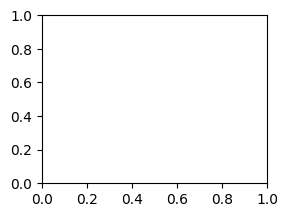

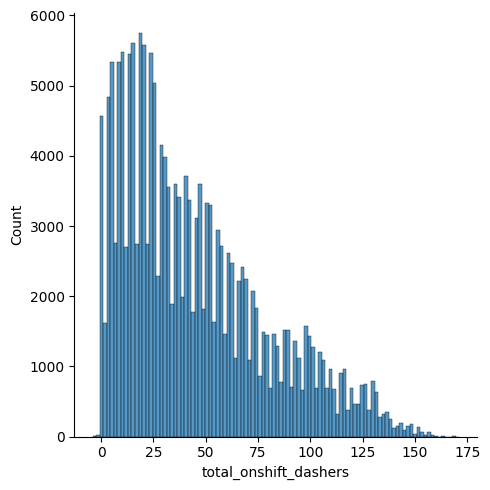

In [28]:
plt.subplot(2,2,1)
sns.displot(df["total_onshift_dashers"])

In [29]:
# sns.displot(df["total_busy_dashers"])
# plt.figure(figsize=(10,60))
# for i,col in enumerate(df.columns):
#     plt.subplot(12,2,i+1)
#     sns.boxplot(df[col])

In [30]:
# plt.figure(figsize=(10,60))
# for i,col in enumerate(df.columns):
#     plt.subplot(12,2,i+1)
#     sns.histplot(df[col])

In [31]:
# plt.figure(figsize=(10,60))
# for i,col in enumerate(df.columns):
#     plt.subplot(12,2,i+1)
#     sns.distplot(df[col])
# will give an error saying could not convert string to float 

In [32]:
df.describe()

market_id                     created_at  \
count  196441.000000                         197428   
mean        2.978706  2015-02-04 22:00:09.537962752   
min         1.000000            2014-10-19 05:24:15   
25%         2.000000            2015-01-29 02:32:42   
50%         3.000000     2015-02-05 03:29:09.500000   
75%         4.000000     2015-02-12 01:39:18.500000   
max         6.000000            2015-02-18 06:00:44   
std         1.524867                            NaN   

                actual_delivery_time       store_id  order_protocol  \
count                         197421  197428.000000   196433.000000   
mean   2015-02-04 22:48:23.348914432    3530.510272        2.882352   
min              2015-01-21 15:58:11       1.000000        1.000000   
25%              2015-01-29 03:22:29    1686.000000        1.000000   
50%              2015-02-05 04:40:41    3592.000000        3.000000   
75%              2015-02-12 02:25:26    5299.000000        4.000000   
max              2015-02-19 22:45:31    6987.000000        7.000000   
std                              NaN    2053.496711        1.503771   

         total_items       subtotal  num_distinct_items  min_item_price  \
count  197428.000000  197428.000000       197428.000000   197428.000000   
mean        3.196391    2682.331402            2.670791      686.218470   
min         1.000000       0.000000            1.000000      -86.000000   
25%         2.000000    1400.000000            1.000000      299.000000   
50%         3.000000    2200.000000            2.000000      595.000000   
75%         4.000000    3395.000000            3.000000      949.000000   
max       411.000000   27100.000000           20.000000    14700.000000   
std         2.666546    1823.093688            1.630255      522.038648   

       max_item_price  total_onshift_dashers  total_busy_dashers  \
count   197428.000000          181166.000000       181166.000000   
mean      1159.588630              44.808093           41.739747   
min          0.000000              -4.000000           -5.000000   
25%        800.000000              17.000000           15.000000   
50%       1095.000000              37.000000           34.000000   
75%       1395.000000              65.000000           62.000000   
max      14700.000000             171.000000          154.000000   
std        558.411377              34.526783           32.145733   

       total_outstanding_orders  estimated_order_place_duration  \
count             181166.000000                   197428.000000   
mean                  58.050065                      308.560179   
min                   -6.000000                        0.000000   
25%                   17.000000                      251.000000   
50%                   41.000000                      251.000000   
75%                   85.000000                      446.000000   
max                  285.000000                     2715.000000   
std                   52.661830                       90.139653   

       estimated_store_to_consumer_driving_duration  actual_time_for_delivery  
count                                 196902.000000              1.974210e+05  
mean                                     545.358935              2.908257e+03  
min                                        0.000000              1.010000e+02  
25%                                      382.000000              2.104000e+03  
50%                                      544.000000              2.660000e+03  
75%                                      702.000000              3.381000e+03  
max                                     2088.000000              8.516859e+06  
std                                      219.352902              1.922961e+04

In [33]:
df[df["total_items"] == df["total_items"].max()]

market_id          created_at actual_delivery_time  store_id  \
47231        2.0 2015-02-06 00:42:39  2015-02-06 01:33:34       777   

       order_protocol  total_items  subtotal  num_distinct_items  \
47231             4.0          411      3115                   5   

       min_item_price  max_item_price  total_onshift_dashers  \
47231               0             299                   35.0   

       total_busy_dashers  total_outstanding_orders  \
47231                35.0                      39.0   

       estimated_order_place_duration  \
47231                             251   

       estimated_store_to_consumer_driving_duration non_null_primary_category  \
47231                                         573.0                      fast   

       actual_time_for_delivery  
47231                    3055.0

In [34]:
df.shape

(197428, 17)

In [35]:
df.drop(47231,inplace=True)
df.shape

(197427, 17)

In [36]:
# sns.boxplot(df["total_items"])

In [37]:
len(df.total_items[df["total_items"] < 4])

135006

In [38]:
df.total_items[df["total_items"] > 4].sort_values(ascending=True)


197425     5
58143      5
132410     5
132376     5
132372     5
          ..
15053     57
75577     59
182796    64
182800    66
182223    84
Name: total_items, Length: 37283, dtype: int64

In [39]:
df["actual_time_for_delivery"].sort_values(ascending=False)

2690      8516859.0
185550     373879.0
27189      332482.0
83055       57032.0
190860      54447.0
            ...    
78511           NaN
115982          NaN
140635          NaN
158967          NaN
170416          NaN
Name: actual_time_for_delivery, Length: 197427, dtype: float64

In [40]:
df["actual_time_for_delivery"].isna().sum()

7

In [41]:
df.dropna(subset=["actual_time_for_delivery"],inplace=True)
df.isna().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                0
store_id                                            0
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
non_null_primary_category                         867
actual_time_for_delivery                            0
dtype: int64

In [42]:
df["order_protocol"].unique()

array([ 1.,  2.,  3.,  4., nan,  5.,  6.,  7.])

In [43]:
df["order_protocol"].value_counts()


order_protocol
1.0    54723
3.0    53197
5.0    44289
2.0    24051
4.0    19352
6.0      794
7.0       19
Name: count, dtype: int64

In [44]:
# plt.bar(df["order_protocol"].value_counts().index,df["order_protocol"].value_counts().values)

In [45]:
df.head()

market_id          created_at actual_delivery_time  store_id  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:27:16      1845   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:56:29      5477   
2        3.0 2015-01-22 20:39:28  2015-01-22 21:09:09      5477   
3        3.0 2015-02-03 21:21:45  2015-02-03 22:13:00      5477   
4        3.0 2015-02-15 02:40:36  2015-02-15 03:20:26      5477   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0             1.0            4      3441                   4             557   
1             2.0            1      1900                   1            1400   
2             1.0            1      1900                   1            1900   
3             1.0            6      6900                   5             600   
4             1.0            3      3900                   3            1100   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1900                    1.0                 0.0   
3            1800                    1.0                 1.0   
4            1600                    6.0                 6.0   

   total_outstanding_orders  estimated_order_place_duration  \
0                      21.0                             446   
1                       2.0                             446   
2                       0.0                             446   
3                       2.0                             446   
4                       9.0                             446   

   estimated_store_to_consumer_driving_duration non_null_primary_category  \
0                                         861.0                  american   
1                                         690.0                    indian   
2                                         690.0                    indian   
3                                         289.0                    indian   
4                                         650.0                    indian   

   actual_time_for_delivery  
0                    3779.0  
1                    4024.0  
2                    1781.0  
3                    3075.0  
4                    2390.0

In [46]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'order_protocol', 'total_items', 'subtotal', 'num_distinct_items',
       'min_item_price', 'max_item_price', 'total_onshift_dashers',
       'total_busy_dashers', 'total_outstanding_orders',
       'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration',
       'non_null_primary_category', 'actual_time_for_delivery'],
      dtype='object')

In [47]:
# sns.histplot(df["actual_time_for_delivery"],bins=50,kde=True)

In [48]:
df["actual_time_for_delivery"].sort_values(ascending=False)[:20]

2690      8516859.0
185550     373879.0
27189      332482.0
83055       57032.0
190860      54447.0
86952       48178.0
76743       45685.0
105825      39352.0
66787       38457.0
175971      38143.0
139989      36196.0
51228       32929.0
63505       32690.0
31185       32159.0
109875      28325.0
39989       28207.0
171404      27083.0
29715       25598.0
103937      24881.0
79473       23995.0
Name: actual_time_for_delivery, dtype: float64

In [49]:
df.loc[2690]

market_id                                                       1.0
created_at                                      2014-10-19 05:24:15
actual_delivery_time                            2015-01-25 19:11:54
store_id                                                       3560
order_protocol                                                  1.0
total_items                                                       1
subtotal                                                       1695
num_distinct_items                                                1
min_item_price                                                 1595
max_item_price                                                 1595
total_onshift_dashers                                           NaN
total_busy_dashers                                              NaN
total_outstanding_orders                                        NaN
estimated_order_place_duration                                  446
estimated_store_to_consumer_driving_duration    

In [50]:
df.isna().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                0
store_id                                            0
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
non_null_primary_category                         867
actual_time_for_delivery                            0
dtype: int64

In [51]:
total_on_shift = df[df["total_onshift_dashers"].isna()]
total_on_shift

market_id          created_at actual_delivery_time  store_id  \
160           6.0 2015-02-06 01:11:56  2015-02-06 01:42:51       976   
161           6.0 2015-02-14 02:07:47  2015-02-14 03:17:37       976   
162           6.0 2015-01-31 21:58:30  2015-01-31 22:55:32       976   
163           6.0 2015-02-08 03:28:59  2015-02-08 05:32:11       976   
164           6.0 2015-01-23 19:29:17  2015-01-23 20:25:25       976   
...           ...                 ...                  ...       ...   
197196        3.0 2015-02-10 19:55:29  2015-02-10 20:33:13      5382   
197197        3.0 2015-02-06 03:05:38  2015-02-06 03:58:16      5382   
197198        3.0 2015-01-23 03:57:56  2015-01-23 04:43:17      5382   
197199        3.0 2015-01-24 03:15:41  2015-01-24 04:04:19      5382   
197421        1.0 2015-01-30 03:35:01  2015-01-30 04:42:19      2956   

        order_protocol  total_items  subtotal  num_distinct_items  \
160                2.0            2       575                   2   
161                2.0            5      1415                   3   
162                2.0            1       650                   1   
163                2.0            5      1550                   5   
164                2.0            6      1110                   5   
...                ...          ...       ...                 ...   
197196             2.0            3      1792                   3   
197197             2.0            8      2923                   5   
197198             2.0            3      3297                   3   
197199             2.0            4      2776                   4   
197421             4.0            2       979                   2   

        min_item_price  max_item_price  total_onshift_dashers  \
160                225             350                    NaN   
161                185             675                    NaN   
162                650             650                    NaN   
163                225             700                    NaN   
164                185             185                    NaN   
...                ...             ...                    ...   
197196             163            1177                    NaN   
197197              50            1199                    NaN   
197198             799            1299                    NaN   
197199             179            1099                    NaN   
197421             145             339                    NaN   

        total_busy_dashers  total_outstanding_orders  \
160                    NaN                       NaN   
161                    NaN                       NaN   
162                    NaN                       NaN   
163                    NaN                       NaN   
164                    NaN                       NaN   
...                    ...                       ...   
197196                 NaN                       NaN   
197197                 NaN                       NaN   
197198                 NaN                       NaN   
197199                 NaN                       NaN   
197421                 NaN                       NaN   

        estimated_order_place_duration  \
160                                251   
161                                251   
162                                251   
163                                251   
164                                251   
...                                ...   
197196                             251   
197197                             251   
197198                             251   
197199                             251   
197421                             251   

        estimated_store_to_consumer_driving_duration  \
160                                            671.0   
161                                            893.0   
162                                            479.0   
163                                           1104.0   
164                                            584.0   
...                

In [52]:
total_on_shift.isna().sum()

market_id                                          68
created_at                                          0
actual_delivery_time                                0
store_id                                            0
order_protocol                                     78
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration       44
non_null_primary_category                         102
actual_time_for_delivery                            0
dtype: int64

In [53]:
# sns.histplot(df["market_id"],kde=True)

In [54]:
# sns.barplot(df["market_id"])

In [55]:
# sns.distplot(df["market_id"],kde=True)


In [56]:
# sns.displot(df["market_id"],kde=True)


# QQ PLOT 

In [57]:
import scipy.stats as stat 
import pylab 

((array([-4.49301923, -4.3004541 , -4.19592919, ...,  4.19592919,
          4.3004541 ,  4.49301923]),
  array([ 1.,  1.,  1., ..., nan, nan, nan])),
 (nan, nan, nan))

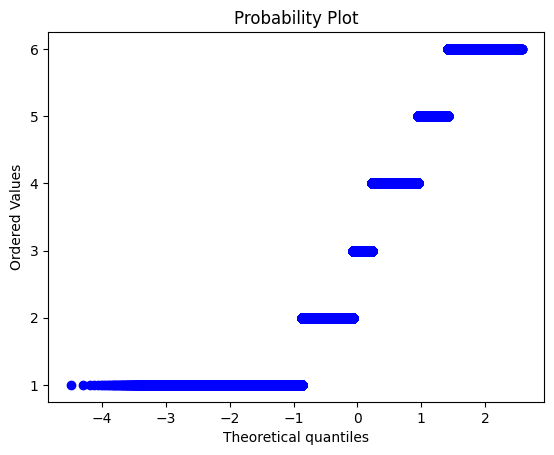

In [58]:
stat.probplot(df["market_id"],dist='norm',plot=pylab)

((array([-4.49301923, -4.3004541 , -4.19592919, ...,  4.19592919,
          4.3004541 ,  4.49301923]),
  array([-4., -3., -2., ..., nan, nan, nan])),
 (nan, nan, nan))

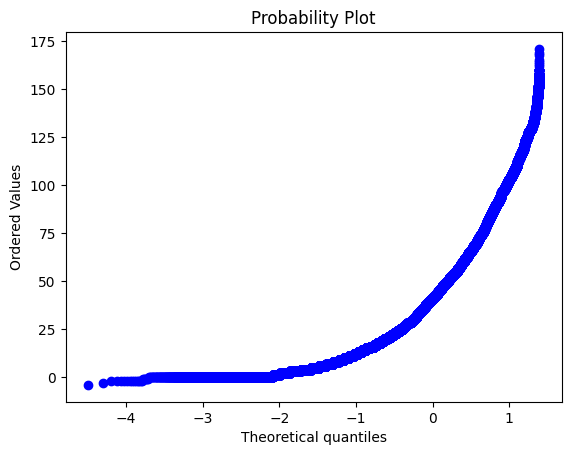

In [59]:
stat.probplot(df["total_onshift_dashers"],dist='norm',plot=pylab)

In [60]:
X = df.drop(["created_at",'actual_delivery_time','non_null_primary_category'],axis=1)

In [61]:
# for i in range(len(X.columns)):
#     plt.figure(figsize=(11,5))
#     plt.subplot(1,2,1)
#     sns.histplot(X[X.columns[i]],kde=True)
#     plt.subplot(1,2,2)
#     stat.probplot(X[X.columns[i]],dist='norm',plot=pylab)

In [62]:
X.columns

Index(['market_id', 'store_id', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration',
       'actual_time_for_delivery'],
      dtype='object')

((array([-4.49301923, -4.3004541 , -4.19592919, ...,  4.19592919,
          4.3004541 ,  4.49301923]),
  array([1.010000e+02, 2.230000e+02, 2.970000e+02, ..., 3.324820e+05,
         3.738790e+05, 8.516859e+06])),
 (1273.4900826417527, 2908.2566305338873, 0.06622392854660895))

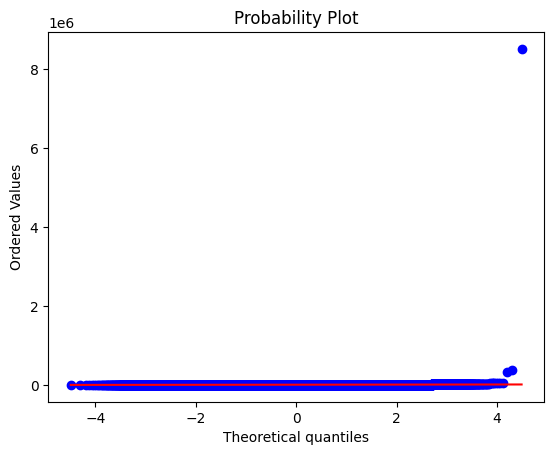

In [63]:
stat.probplot(df['actual_time_for_delivery'],dist='norm',plot=pylab)

In [64]:
highest_val = df["actual_time_for_delivery"].mean() + 3 * df["actual_time_for_delivery"].std()
highest_val

60597.22956522377

In [65]:
df[df["actual_time_for_delivery"] > highest_val]

market_id          created_at actual_delivery_time  store_id  \
2690          1.0 2014-10-19 05:24:15  2015-01-25 19:11:54      3560   
27189         1.0 2015-02-16 02:24:09  2015-02-19 22:45:31      4338   
185550        4.0 2015-01-28 08:34:06  2015-02-01 16:25:25      6503   

        order_protocol  total_items  subtotal  num_distinct_items  \
2690               1.0            1      1695                   1   
27189              3.0            4      4980                   4   
185550             5.0            3      1520                   3   

        min_item_price  max_item_price  total_onshift_dashers  \
2690              1595            1595                    NaN   
27189              995            1795                   72.0   
185550             220             750                    0.0   

        total_busy_dashers  total_outstanding_orders  \
2690                   NaN                       NaN   
27189                 68.0                     104.0   
185550                 0.0                       0.0   

        estimated_order_place_duration  \
2690                               446   
27189                              251   
185550                             251   

        estimated_store_to_consumer_driving_duration  \
2690                                           412.0   
27189                                          767.0   
185550                                         476.0   

       non_null_primary_category  actual_time_for_delivery  
2690                     italian                 8516859.0  
27189                     indian                  332482.0  
185550                   dessert                  373879.0

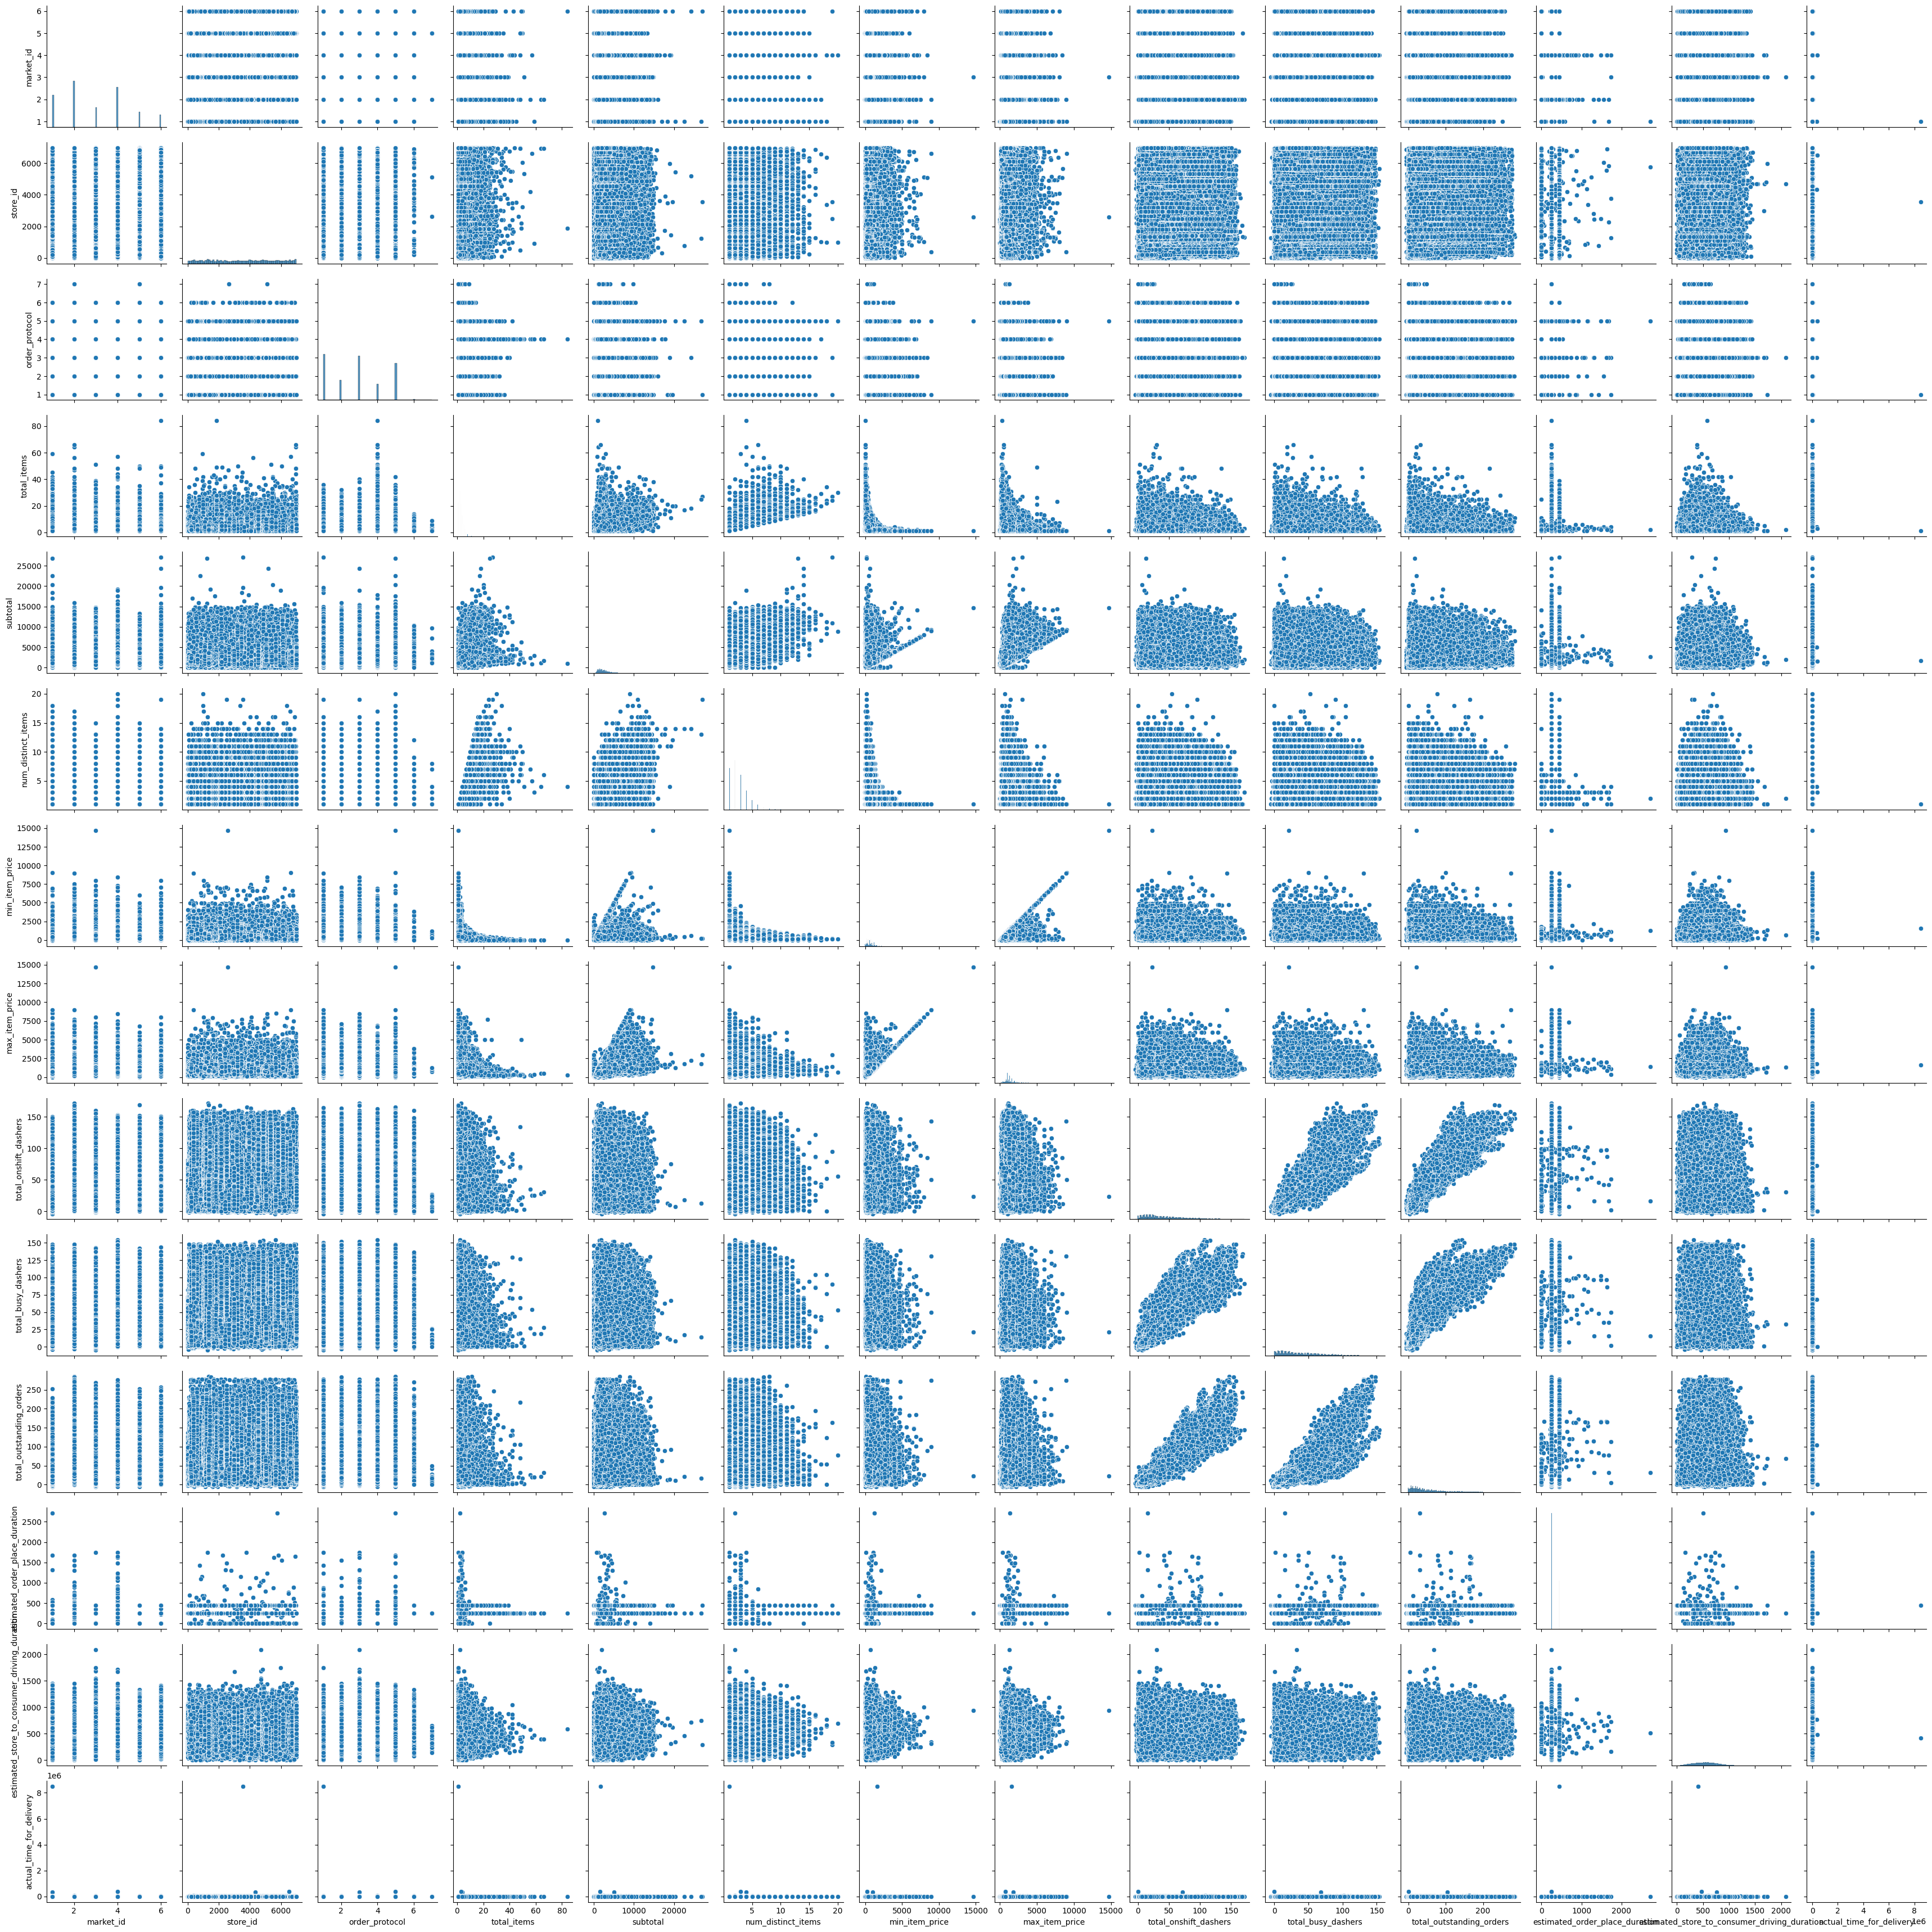

In [66]:
# sns.pairplot(df)